<h1 style="background-color:yellow; "> Table of Contents</h1> <a class="anchor" id="table-of-content"></a>
    
* [1. Problem Background & Motivation](#problem-background)
* [2. Library Importation](#import-package)
* [3. Custom Libraries](#custom-libraries)
* [4. Connect to Data Source and Data Extraction](#data-extraction)
* [5. Exploratory Data Analysis](#data-prep)
* [6. Machine Learning Model](#ml-model)
* [7. Deployment](#Deployment)
* [8. Conclusion](#Conclusion)


<h1 style="background-color:powderblue; ">1. Problem Background and Motivation</h1> <a class="anchor" id="problem-background"></a>

<h3> Flight Delay Prediction </h3>

<h2> 1.1 General Info </h2>
A flight delay is when an airline flight takes off and/or lands later than its scheduled time. 
In the United States, the Federal Aviation Administration estimates that flight delays cost airlines $22 billion yearly. This is largely because airlines are forced to pay federal authorities when they hold planes on the tarmac for more than three hours for domestic flights or more than four hours for international flights. 

Hence, Predicting when a flight might get delayed would be an advantage to the airline industry that they can be well aware of the situation early and will help them in reducing the cost of it.

<img src="https://miro.medium.com/max/1400/1*XmYlef2c_8ySPFb7smevbA.png" alt="Flight delay board" />


 
 
<h2> 1.2 What is the problem? </h2>
  The airline industry is vast and all the airline companies would like to be profitable always( Like everyother company). But managing an airline comes with its own problems and technical difficulties. 
  
   One of the major problem that they encounter is flight delay, this might seem like a small issue for a customer but for the airline company, it comes with a cost. The problem is that they rarely get to know beforehand, if the flight is going to get delayed or not. There is a lot of factors which is not in their hand ( bad weather, bird strikes, runway damage etc).
   
   But they can atleast be well prepared with the historical and live data that they possess which can be used to create a Classification model which can predict if a flight is going to be delayed or not due to some predictor variables.
 

<h2> 1.3 Interested Party and Reason </h2>
   The intended party would be any airline company like Qatar,American Airlines, Southwest or many othere. This model will be very useful to them as it will be a cost saving solution to them. A few more advantages are listed below,
    

 Advantages of having a ML model with Flight delay prediction powers:
  >- The Airline company will have a fair idea about if a flight might get delayed or not.
  >- Based on the above information, the company can take appropriate actions in order to save money like they can schedule the parking time in the airport for a lesser rate (The cost of parking an aeroplane in the airport is very very high).
  >- The model maybe used to evaluate a pattern in the delayed flights. For example, multiple flights can be delayed due to bad weather in a certain season every year, then the airline company can decide how to take care of this problem.
  >- Based on the results, the airline company could also tell the passengers about the situation well in advance and keep their expectations right.

* [Go to Top](#table-of-content) 

<h1 style="background-color:powderblue; ">2. Library Importation</h1> <a class="anchor" id="import-package"></a>
  
  Import the required packages needed for the model.
  

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import pickle

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

<h1 style ="background-color:powderblue;"> 3. Custom Built Libraries</h1> <a class="anchor" id="custom-libraries"> </a>

In [2]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1-Score":F1
                          })

    # Let's look at our dataframe
    return result

<h1 style="background-color:powderblue; ">4. Data Extraction and Initial Evaluation</h1> <a class="anchor" id="data-extraction"></a>


Read the input data and make sense of it.

In [3]:
# Read in data - To see what the data can tell us
url = 'https://github.com/Bhyrav17/FlightDelayPrediction_Classification/blob/main/Data/FlightDelays_Clean.csv?raw=true'
df = pd.read_csv(url, index_col=0)

# get the last 10 records to get a count of the records and see the column data
df.tail(10) 

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2191,0,18.00,0,0,0,0,1,0,1,0,0,228,0,1,0,0,0,0,0,0,1,0,0
2192,1,18.00,0,0,0,0,1,0,1,0,0,228,0,1,0,0,0,0,0,0,1,0,0
2193,0,18.00,0,0,0,0,1,0,1,0,0,228,0,1,0,0,0,0,0,0,1,0,0
2194,0,18.00,0,0,0,0,1,0,1,0,0,228,0,1,0,0,0,0,0,0,1,0,0
2195,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,1,0,0,0,0
2196,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,1,0,0,0
2197,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,1,0,0
2198,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,1,0
2199,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,0,0,0,0,0,0,1
2200,0,21.33,0,0,0,0,1,0,0,0,1,229,0,1,0,0,1,0,0,0,0,0,0


In [4]:
# check number of rows with non null values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   status_delayed       2201 non-null   int64  
 1   sch_dep_time         2201 non-null   float64
 2   carrier_delta        2201 non-null   int64  
 3   carrier_us           2201 non-null   int64  
 4   carrier_envoy        2201 non-null   int64  
 5   carrier_continental  2201 non-null   int64  
 6   carrier_discovery    2201 non-null   int64  
 7   carrier_other        2201 non-null   int64  
 8   dest_jfk             2201 non-null   int64  
 9   dest_ewr             2201 non-null   int64  
 10  dest_lga             2201 non-null   int64  
 11  distance             2201 non-null   int64  
 12  origin_dca           2201 non-null   int64  
 13  origin_iad           2201 non-null   int64  
 14  origin_bwi           2201 non-null   int64  
 15  bad_weather          2201 non-null   i

> **Initial Evaluation - Notes on Findings**<br><br>
>**Observations:**<br>
>>**2201 Records**<br><br>
>>**Outcome:** The target variable is **status_delayed**<br>

The below observations is just assumptions made with the given data with logical aspects.

>- Its a Classification problem where the predictors are scheduled time, different carriers, origin of flight, destination of flight, bad weather and the days of the week.
>- status_delayed ( 1 if the flight has been delayed, 0 otherwise)
>- sch_dep_time ( Gives the time of the scheduled flight) - Wil be a priority predictor
>- Carriers (delta,us,envoy,continental,discovery,other) - The airlines which are popular around the world and which fly frequently from our origin to destinations
>- Origin(dca,iad,bwi) - Origin of the flights
>- Destinations (jfk,ewr,lga) - Destination of flights
>- bad_weather - Its 1, if bad weather condition exists in the flight path, 0 otherwise
>- Weekdays( Mon,Tue,Wed,Thur,Fri,Sat,Sun) - The day of the flight
>- Distance ( Gives us the distance between origin and destination in km or miles)



>[Go to Data Extraction](#data-extraction)

<h1 style="background-color:powderblue; ">5. Exploratory Data Analysis</h1> <a class="anchor" id="data-prep"></a>

* [Go to Top of Notebook](#table-of-content)

- [X] [Initial Evaluation](#data-extraction)
- [X] [Initial Cleanup - Duplicates and missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers-treatment)
- [X] [Feature Selection](#feature-selection)
- [X] [Feature Transformations](#feature-transformations)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#data-norm)


> <h3 style="color:MediumSeaGreen;"> Initial Cleanup - dupes, missing values </h3> <a class="anchor" id="missing-values"></a>

In [5]:
df.columns = df.columns.str.replace(' ', '_') # replacing the spaces in the columns with underscore 

In [6]:
df.isnull().sum()  #isnull() counts all the nulls in the columns and sum() adds them up for every column

status_delayed         0
sch_dep_time           0
carrier_delta          0
carrier_us             0
carrier_envoy          0
carrier_continental    0
carrier_discovery      0
carrier_other          0
dest_jfk               0
dest_ewr               0
dest_lga               0
distance               0
origin_dca             0
origin_iad             0
origin_bwi             0
bad_weather            0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
Friday                 0
Saturday               0
Sunday                 0
dtype: int64

> **Initial Cleanup:** <br>
> *Summary*<br>
>>- There was no nulls or dupes present in the data.


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Outlier Detection & Treatment </h3> <a class="anchor" id="outliers-treatment"></a>

In [7]:
DataTypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_temp = df.select_dtypes(include=DataTypes)


df_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
status_delayed,2201.00,0.19,0.40,0.00,0.00,0.00,0.00,1.00
sch_dep_time,2201.00,13.86,4.32,6.00,10.00,14.92,17.17,21.50
carrier_delta,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
carrier_us,2201.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00
carrier_envoy,2201.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
carrier_continental,2201.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
carrier_discovery,2201.00,0.25,0.43,0.00,0.00,0.00,1.00,1.00
carrier_other,2201.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
dest_jfk,2201.00,0.18,0.38,0.00,0.00,0.00,0.00,1.00
dest_ewr,2201.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00


<AxesSubplot:xlabel='status_delayed', ylabel='Count'>

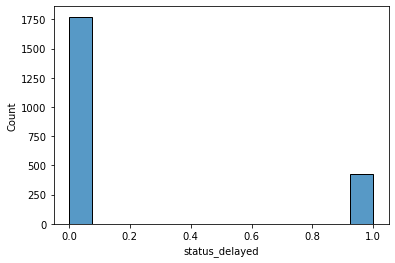

In [8]:
sns.histplot(data=df,x='status_delayed')

> **Outlier Detection: Summary of Actions**<br>
<br>
>**Note:**<br>
    >- There was no outliers found in this data
    >- Clearly there is a class imbalance problem as there is more number of 0's than 1's.  Possible solution would be to do undersampling or oversampling - Will try it out.

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Selection</h3> <a class="anchor" id="feature-selection"></a>

In [9]:
df.select_dtypes(include=DataTypes).corr().round(3)

,status_delayed,sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
status_delayed,1.00,0.11,-0.09,-0.13,0.08,0.04,0.08,0.03,0.03,0.08,-0.09,-0.02,-0.11,0.09,0.04,0.25,0.01,-0.02,-0.05,-0.00,-0.09,0.07,0.08
sch_dep_time,0.11,1.00,0.01,-0.02,-0.06,0.02,0.11,-0.06,0.12,-0.02,-0.07,0.06,-0.03,0.06,-0.04,-0.01,-0.03,-0.01,0.00,-0.02,-0.01,0.08,-0.01
carrier_delta,-0.09,0.01,1.00,-0.22,-0.18,-0.10,-0.27,-0.24,-0.12,-0.30,0.37,0.07,0.36,-0.31,-0.12,-0.03,0.01,-0.00,0.00,0.00,-0.00,-0.01,0.00
carrier_us,-0.13,-0.02,-0.22,1.00,-0.19,-0.10,-0.27,-0.25,-0.22,-0.31,0.45,0.08,0.37,-0.32,-0.13,-0.05,0.01,0.01,-0.01,-0.01,-0.04,0.01,0.01
carrier_envoy,0.08,-0.06,-0.18,-0.19,1.00,-0.08,-0.23,-0.20,0.14,-0.26,0.13,0.05,0.31,-0.27,-0.10,0.06,0.01,0.01,0.02,0.00,-0.04,-0.01,-0.00
carrier_continental,0.04,0.02,-0.10,-0.10,-0.08,1.00,-0.12,-0.11,-0.10,0.32,-0.22,-0.20,0.17,-0.14,-0.06,0.01,0.01,0.01,0.01,0.01,-0.04,0.00,0.01
carrier_discovery,0.08,0.11,-0.27,-0.27,-0.23,-0.12,1.00,-0.30,0.38,-0.01,-0.28,0.49,-0.68,0.80,-0.15,0.03,-0.01,-0.01,-0.01,-0.01,0.03,0.02,-0.00
carrier_other,0.03,-0.06,-0.24,-0.25,-0.20,-0.11,-0.30,1.00,-0.15,0.64,-0.47,-0.60,-0.30,0.04,0.51,-0.02,-0.03,-0.01,0.00,0.01,0.06,-0.01,-0.01
dest_jfk,0.03,0.12,-0.12,-0.22,0.14,-0.10,0.38,-0.15,1.00,-0.30,-0.48,0.24,-0.23,0.22,0.02,0.02,-0.02,-0.02,-0.01,-0.01,0.06,0.04,-0.02
dest_ewr,0.08,-0.02,-0.30,-0.31,-0.26,0.32,-0.01,0.64,-0.30,1.00,-0.69,-0.59,-0.32,0.18,0.28,-0.01,-0.02,-0.00,0.00,0.01,0.03,-0.01,-0.01


In [10]:
#Plotting heat map to visualize the correlations - More user friendly than to check with the numbers and signs.  
#I'm choosing to share this map as it makes life easier by letting us find the strong/weak correlations faster
#df_corr=df.corr().round(3)
#f,ax=plt.subplots(figsize=(12,7))
#sns.heatmap(df_corr,cmap='viridis',annot=True)
#plt.title("Correlation between features",weight='bold',fontsize=18)
#plt.show()

>**Note:**<br>
>Features with Strong/Weak Correlations :
>1. Bad_weather(+)
>2. sch_dep_time (+)
>3. carrier_delta, carrier_us (-) (Mildly correlated)
>4. carrier_envoy,carrier_continental,carrier_discovery,carrier_other (+)(Mildly correlated)
>5. dest_jfk,dest_ewr (+)(Mildly correlated)
>6. Distance (+)(Mildly correlated)
>7. origin_dca,origin_iad,origin_bwi (mildy correlated)
>8. Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday (mildy correlated)
<br>
<br>

>**Decision:**<br>
>1. Going with all the predictor variables for now ( Can come back and revisit it later if for any reason)
<br><br>
>**NOTE:** <br>
   We have to keep in mind that, for classification problems - we do regularization to pick the features. Can check once again coming back


>[Go to Data Prep Index](#data-prep)

> **Feature Selection:** <br>
> *Summary*<br>
>>- Keeping all the predictor variables<br>

>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Feature Transformation</h3> <a class="anchor" id="feature-transformations"></a>

> **Feature Transformation:** <br>
> *Summary*<br>
>>- All the variables are in the desired formats, hence no need of feature transformation<br>



>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Partition - TTS </h3> <a class="anchor" id="data-split"></a>

>- 1. Encompassing all the predictor variables into a variable X  <br>
>- 2. Encompassing the target variable to variable Y<br>
>- 3. Split the Training and Test Data by 70/30 with random state- 0<br>

In [11]:
target = ['status_delayed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

In [12]:
#To check how the data has been split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1540, 22)
(1540, 1)
(661, 22)
(661, 1)


>[Go to Data Prep Index](#data-prep)

> <h3 style="color:MediumSeaGreen;"> Data Normalization </h3> <a class="anchor" id="data-norm"></a>

In [13]:
# Normalizing the predictor variables using Z-Scores method.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>**NOTE:**:
 Always do Data Normalization for KNN as it is sensitive to the scaling of the data. It's always a good idea to do it when this model is involved.

>[Go to Data Prep Index](#data-prep)

<h1 style="background-color:powderblue; ">6. Machine Learning </h1> <a class="anchor" id="ml-model"></a>

- [X] [kNN classifier](#first-model)
- [X] [Logistic Regression](#second-model)
- [ ] [Performance Evaluation](#perf-eval)


* [Go to Top](#table-of-content)

> **Model 1** <a class="anchor" id="first-model"></a>
<br>
>Info:<br>

>KNN classifer:
>- Finds the nearest neighour and assigns the new record to the variable with the most votes  
>- Pick an odd number for KNN as there would be no ambiguity during voting 
>- Evaluate using accuracy

In [14]:
# 1. Looping through different values of K to find optimal value of K
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.75
1,3,0.78
2,5,0.80
3,7,0.79
4,9,0.80
5,11,0.80
6,13,0.79
7,15,0.81
8,17,0.81
9,19,0.81


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 11 as this achieves the highest accuracy value with less erros <br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [15]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.8


#### Elbow Graph method

In [16]:
#Trying the elbow graph to find the best value of K - This takes into account the error rate to decide on the value of K

error_rate = []

# Will take some time
for i in range(1,40):    
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train,y_train.values.ravel())
    pred_i = knn1.predict(X_test)
    pred_i = pred_i.reshape(X_test.shape[0],1)
    error_rate.append(np.mean(pred_i != y_test,axis=0))

Text(0, 0.5, 'Error Rate')

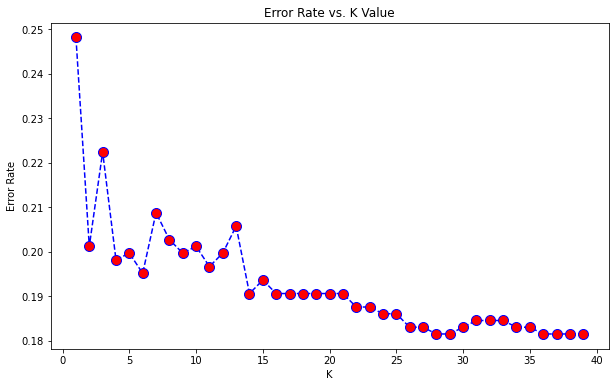

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

> **MODEL1(KNN) - Summary and Questions** <br>
> *Summary*<br>
>>- The Accuracy score is the highest for a certain value of k, hence we select a value of K which does not overfit/underfit the data too much i.e. k=11<br>
>>- Tried the elbow graph - We see that the graph has a lowest error when k=11 and goes up again after that, hence we are selecting a value of k to be 11<br>


> **Model 2** <a class="anchor" id="second-model"></a>
<br>
>Logistic Regression( Logistic Model):

>- Running the same data with logit model to compare the performance
>- Defining multiple thresholds to check which is better


In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

#predicting the values with the trained model
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.82
Testing data Accuracy: 0.82


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

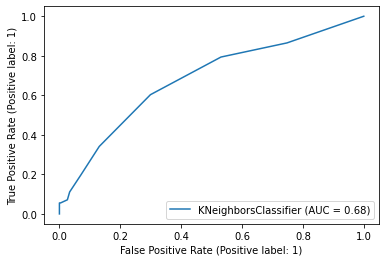

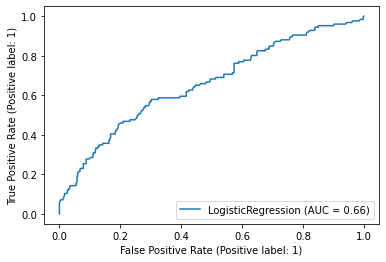

In [19]:
# ROC curve for kNN
metrics.RocCurveDisplay.from_estimator(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.RocCurveDisplay.from_estimator(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our **KNN Model** so I will use that model to further evaluate probability thresholds and corresponding performance measures

> **Performance metrics** <a class="anchor" id="perf-eval"></a>

In [20]:
class_perf_measures(knn,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1-Score
0,0.00,126,0,535,0,0.19,1.00,0.19,0.32
1,0.10,100,251,284,26,0.26,0.79,0.53,0.39
2,0.20,76,375,160,50,0.32,0.60,0.68,0.42
3,0.30,43,465,70,83,0.38,0.34,0.77,0.36
4,0.40,25,497,38,101,0.40,0.20,0.79,0.26
5,0.50,14,517,18,112,0.44,0.11,0.80,0.18
6,0.60,9,521,14,117,0.39,0.07,0.80,0.12
7,0.70,7,533,2,119,0.78,0.06,0.82,0.10
8,0.80,7,535,0,119,1.00,0.06,0.82,0.11
9,0.90,7,535,0,119,1.00,0.06,0.82,0.11


1. **Prob Threshold = 0.1**:
    - The probability threshold is set to 10%, which means if the predicted probabilities is greater than or equal to 0.1, then it is termed as FlightDelay(1) else no delay(0)
    - Low threshold value leads our model in predicting more number of flights have been delayed.
    - False positive (FP) - this is in line with the probability taken for observation and is relatively high (284). If the Airline Industry gives importance to this measure,the model will wrongly classify the flight which was not delayed to be termed as Delayed. This wil lead the airline company to incur heavy losses as when a notification is sent to the customer saying the flight has been delayed, He/She will make other plans and reach the airport later and miss the flight due to this error. The airline would then have to bear the cost of this mistake. Hence,False Positive is a costlier mistake to make in this industry.
    - False Negative (FN) - The number is 26 --> reflects in good recall score. If the Airline industry gives importance to this measure,the model will  classify the Flight which was delayed to be termed as not Delayed. This will lead to some confusion among the passengers, but in this context - not a costlier mistake than FP.

       
<br><br>
2. **Prob Threshold = 0.7**:
    - The probability threshold is set to 70%, which means if the predicted probabilities is greater than or equal to 0.7, then it is termed as as FlightDelay(1) else no delay(0)
    - False Positive - 2
    - False Negative - 119
    - is this a better threshold than 0.1?   - Yes, As i'm considering the FP to be the most costliest mistake, reducing the same will lead to better results for the airline company. Checking the precision score : 78% , which is to be considered for these type of mistakes.
<br><br>


3. **Prob Threshold = 0.9**:
    - The probability threshold is set to 90%, which means if the predicted probabilities is greater than or equal to 0.9, then it is termed as TasKCompleted(1) else not completed(0)
    - False Positive - 0
    - False Negative - 119
    - is this a better threshold than 0.1 and 0.7?- NO, Even though i'm considering FP, the precision score is 0 but the  number of False Negatives have also increased significantly.
<br><br>


4. **Which threshold would you choose?  Justify your decision.**

    > According to my business understanding, making a FALSE POSITIVE mistake is more costly to the airline company than false negative as the airline would have to pay the customer or book them on a different flight due to this. This will lead to a bad reputation and also te company would incur losses due to the same.
    
    Hence, I would consider the probability threshold of 50% and penalize the model when it makes a FALSE Positive mistake i.e.Precision score to be important rather than recall or accuracy.

<h1 style="background-color:powderblue; ">7. Deployment </h1> <a class="anchor" id="Deployment"></a>

* [Go to Top](#table-of-content)

In [21]:
pickle_out = open('classifier', mode='wb')
pickle.dump(knn, pickle_out)
pickle_out.close()

In [22]:
%%writefile app.py

import pickle
import streamlit as st

pickle_in = open('classifier', 'rb')   #Unpickling
classifier = pickle.load(pickle_in)

st.set_page_config(page_title='Flight Status Board ', page_icon="✈️")    #The set_page_config method lets us define the webpage title name and icon

@st.cache()


# Define the function which will make the prediction using data
# inputs from users
def prediction(sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,
               dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,
               bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday):
    
    # Make predictions
    prediction = classifier.predict(
        [[sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,
               dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,
               bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday]])
    
    if prediction == 0:
        pred = 'The Flight is ON TIME'
    else:
        pred = 'The Flight has been DELAYES :/'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Flight Status Indicator")   # Title of the model displayed in the webpage
    
    #Give a little bit information of the Model
    st.info('The Model takes in the below predictor variables and predicts if a Flight is going to  be delayer or not.', icon="ℹ️")
    
    # Create input fields
    sch_dep_time = st.number_input("What's the scheduled time of departure for the flight? (In years)",
                                  min_value=6.0,
                                  max_value=21.5,
                                  value=6.0,
                                  step=0.5,
                                 )
    bad_weather = st.number_input("Was there bad weather condition in the flight route? ('1' for Yes and '0' for NO)",
                                  min_value=0,
                                  max_value=1,
                                  value=0,
                                  step=1,
                                 )
    distance = st.number_input("What's the distance between the origin and distance of the flight? (In miles)",
                                  min_value=169,
                                  max_value=229,
                                  value=169,
                                  step=10,
                                 )
    carrier_delta = st.number_input("Is your selected carrier-DELTA? ('1' for Yes and '0' for NO) ",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )

    carrier_us = st.number_input("Is your selected carrier-US?('1' for Yes and '0' for NO)",
                              min_value=0,
                              max_value=1,
                              value=0,
                              step=1
                             )
    carrier_envoy = st.number_input("Is your selected carrier-ENVOY?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    carrier_continental = st.number_input("Is your selected carrier-CONTINENTAL?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    carrier_discovery = st.number_input("Is your selected carrier-DISCOVERY?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    carrier_other = st.number_input("Is your selected carrier-OTHER?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    dest_jfk = st.number_input("Is your Destination-JFK?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    dest_ewr = st.number_input("Is your Destination-EWR?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    dest_lga = st.number_input("Is your Destination-LGA?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    origin_dca = st.number_input("Is your Origin-DCA?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    origin_iad = st.number_input("Is your Origin-IAD?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    origin_bwi = st.number_input("Is your Origin-BWI?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Monday = st.number_input("Is your flight on MONDAY?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Tuesday = st.number_input("Is your flight on Tuesday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Wednesday = st.number_input("Is your flight on Wednesday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Thursday = st.number_input("Is your flight on Thursday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Friday = st.number_input("Is your flight on Friday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Saturday = st.number_input("Is your flight on Saturday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    Sunday = st.number_input("Is your flight on Sunday?('1' for Yes and '0' for NO)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                             )
    

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(sch_dep_time,carrier_delta,carrier_us,carrier_envoy,carrier_continental,carrier_discovery,carrier_other,
               dest_jfk,dest_ewr,dest_lga,distance,origin_dca,origin_iad,origin_bwi,
               bad_weather,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday)
        st.success(result)
        #If the predictions are true, celebrate that the model is properly working, else spit out a  warning
        if(result == 'The Flight is ON TIME'):
            st.balloons()   
        else:
            st.image('https://media.cntraveler.com/photos/57b1ddf87443947d28477866/master/pass/GettyImages-93466101.jpg',caption="Flight delayed",width=500)
    
    st.image("https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png", width = 150)
    st.write("Built by Supreeth P")
    st.write("Version 1.0.0")
    

if __name__=='__main__':
    main()

Overwriting app.py


**NOTE:**
> I tried to change the default probability threshold sent to the pickle file or streamlit ( the ouput deployment) by using pred_proba instead of predict call. Ran into some issues while encoding this with the predictor variables. Still working on this and will get in touch If i'm unable to find the solution.

In [23]:
!streamlit run app.py

^C


<h1 style="background-color:powderblue; ">6. Conclusion </h1> <a class="anchor" id="Conclusion"></a>

* [Go to Top](#table-of-content)

> Coming from a data scientist point of view and in the airline industry, I would address my superiors in the company that making a False positive mistake would be more deadly than the False Negative.

> Based the developed models, I would consider the KNN Model with k=11 which has better AUC than Logistic Model

> I would consider the probability threshold of 50% and penalize the model with FALSE Positive i.e.Precision score to be important rather than recall or accuracy. 

> Making a False Negative is not considered important in this aspect because even though if the model predicts the flight has not been delayed, but in the true sense it has. The customer would have been in the airport and checked IN. They just need to wait. Its not a big loss to the company, even though the customer has to wait for a bit.

> Due to the imbalance in the dataset, our streamlit app will be more leaning towards to one result ( More number of 0's ). This is evident when the app is run and prediction is seen.
